# Below are some of the results that I obtained with the StackOverFlow Data.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from io import BytesIO
import requests
import zipfile

In [204]:
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = BytesIO(r)
    zf = zipfile.ZipFile(s, 'r') # Read in a list of zipped files
    return zf
url = 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
zf = getZIP(url)
tablenames = zf.namelist()
tablenames[tablenames.index('survey_results_public.csv')]
public = pd.read_csv(zf.open(tablenames[tablenames.index('survey_results_public.csv')]))

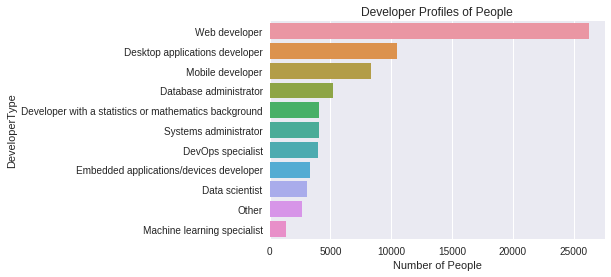

In [205]:
public['DeveloperType']
DTypes = public[['Respondent' , 'DeveloperType']].groupby("DeveloperType" , as_index = False).count()
Types = {'DeveloperType' : ['Web developer', 'Desktop applications developer' ,'Mobile developer' ,'Database administrator' ,'Developer with a statistics or mathematics background' ,'Systems administrator','DevOps specialist', 'Embedded applications/devices developer' , 'Data scientist' , 'Other' , 'Machine learning specialist'] , 'Count' : np.zeros(11)}
def typecount(Types):
    i = 0
    for x in Types['DeveloperType']:
        Types['Count'][i] = public.DeveloperType.str.contains(x).sum()
        i = i + 1
typecount(Types)
Typedf = pd.DataFrame(Types)
%matplotlib inline
sns.barplot(y = 'DeveloperType' , x = 'Count' , data = Typedf)
plt.xlabel('Number of People')
plt.title("Developer Profiles of People")

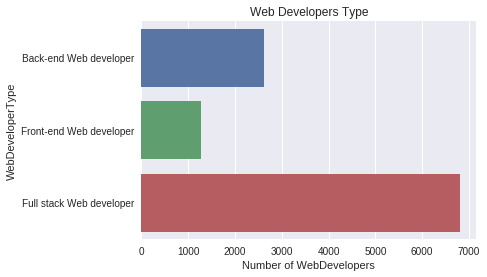

In [206]:
webd = public[['Respondent' , 'WebDeveloperType']].groupby('WebDeveloperType' , as_index = False).count()
sns.barplot(y = 'WebDeveloperType' , x = 'Respondent' , data = webd)
plt.xlabel('Number of WebDevelopers')
plt.title("Web Developers Type")

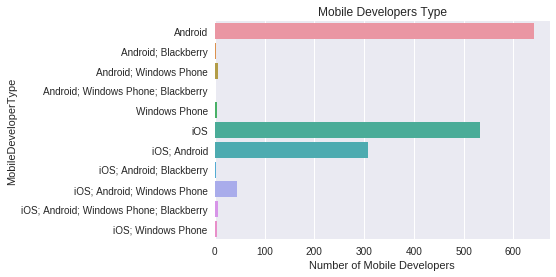

In [207]:
mobiled = public[['Respondent' , 'MobileDeveloperType']].groupby('MobileDeveloperType' , as_index = False).count()
sns.barplot(y = 'MobileDeveloperType' , x = 'Respondent' , data = mobiled)
plt.xlabel('Number of Mobile Developers')
plt.title("Mobile Developers Type")

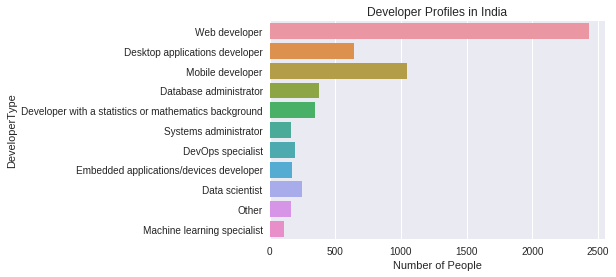

In [208]:

DTypes = public[public.Country == 'India'][['Respondent' , 'DeveloperType']].groupby(["DeveloperType"], as_index = False).count()
DTypes
Types = {'DeveloperType' : ['Web developer', 'Desktop applications developer' ,'Mobile developer' ,'Database administrator' ,'Developer with a statistics or mathematics background' ,'Systems administrator','DevOps specialist', 'Embedded applications/devices developer' , 'Data scientist' , 'Other' , 'Machine learning specialist'] , 'Count' : np.zeros(11)}
def typecount(Types):
    i = 0
    for x in Types['DeveloperType']:
        Types['Count'][i] = public[public.Country == 'India'].DeveloperType.str.contains(x).sum()
        i = i + 1
typecount(Types)
Typedf = pd.DataFrame(Types)
%matplotlib inline
sns.barplot(y = 'DeveloperType' , x = 'Count' , data = Typedf)
plt.xlabel('Number of People')
plt.title("Developer Profiles in India")

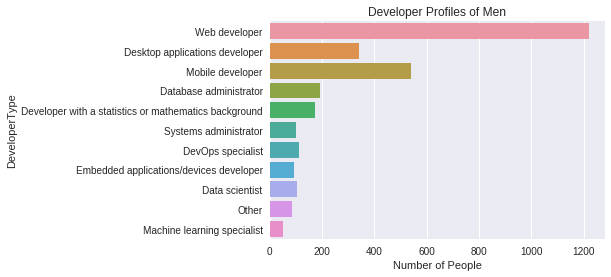

In [209]:

DTypes = public[['Respondent' , 'DeveloperType']].groupby("DeveloperType" , as_index = False).count()
DTypes
Types = {'DeveloperType' : ['Web developer', 'Desktop applications developer' ,'Mobile developer' ,'Database administrator' ,'Developer with a statistics or mathematics background' ,'Systems administrator','DevOps specialist', 'Embedded applications/devices developer' , 'Data scientist' , 'Other' , 'Machine learning specialist'] , 'Count' : np.zeros(11)}
def typecount(Types):
    i = 0
    for x in Types['DeveloperType']:
        Types['Count'][i] = public[(public.Country == 'India') & (public.Gender == 'Male')].DeveloperType.str.contains(x).sum()
        i = i + 1
typecount(Types)
Typedf = pd.DataFrame(Types)
%matplotlib inline
sns.barplot(y = 'DeveloperType' , x = 'Count' , data = Typedf)
plt.xlabel('Number of People')
plt.title("Developer Profiles of Men")

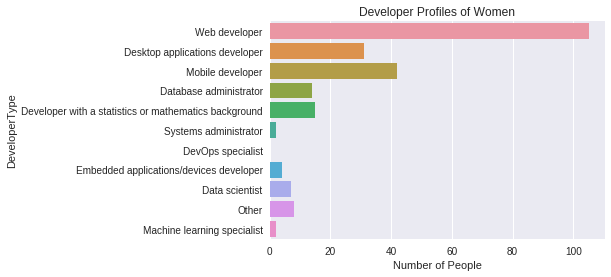

In [210]:

DTypes = public[['Respondent' , 'DeveloperType']].groupby("DeveloperType" , as_index = False).count()
DTypes
Types = {'DeveloperType' : ['Web developer', 'Desktop applications developer' ,'Mobile developer' ,'Database administrator' ,'Developer with a statistics or mathematics background' ,'Systems administrator','DevOps specialist', 'Embedded applications/devices developer' , 'Data scientist' , 'Other' , 'Machine learning specialist'] , 'Count' : np.zeros(11)}
def typecount(Types):
    i = 0
    for x in Types['DeveloperType']:
        Types['Count'][i] = public[(public.Country == 'India') & (public.Gender == 'Female')].DeveloperType.str.contains(x).sum()
        i = i + 1
typecount(Types)
Typedf = pd.DataFrame(Types)
%matplotlib inline
sns.barplot(y = 'DeveloperType' , x = 'Count' , data = Typedf)
plt.xlabel('Number of People')
plt.title("Developer Profiles of Women")

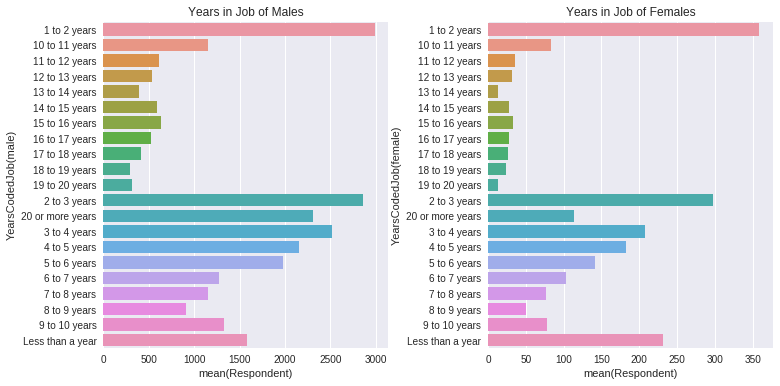

In [211]:
yearscoded = public[public.Gender == 'Male'][[ 'Respondent' , 'YearsCodedJob']].groupby(["YearsCodedJob"] , as_index = False).count()
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 6))
sns.barplot(y = 'YearsCodedJob' , x = 'Respondent' ,data = yearscoded , ax = ax[0])
yearscoded = public[public.Gender == 'Female'][[ 'Respondent' , 'YearsCodedJob']].groupby(["YearsCodedJob"] , as_index = False).count()
sns.barplot(y = 'YearsCodedJob' , x = 'Respondent' ,data = yearscoded , ax = ax[1])
fig.subplots_adjust(wspace=0.35)
ax[0].set_ylabel('YearsCodedJob(male)')
ax[1].set_ylabel('YearsCodedJob(female)')
ax[0].set_title("Years in Job of Males")
ax[1].set_title('Years in Job of Females')

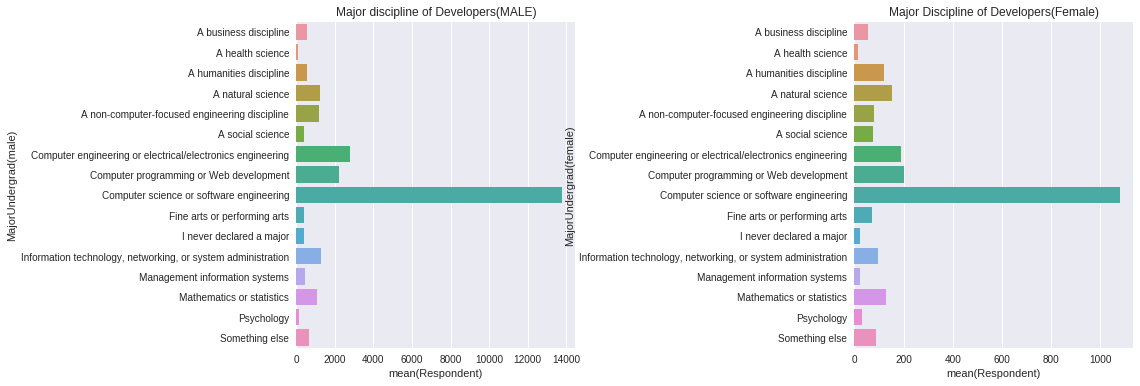

In [212]:
majorundergrad = public[public.Gender == 'Male'][[ 'Respondent' , 'MajorUndergrad']].groupby(["MajorUndergrad"] , as_index = False).count()
fig , ax = plt.subplots(1 , 2 , figsize = (15 , 6))
sns.barplot(y = 'MajorUndergrad' , x = 'Respondent' ,data = majorundergrad , ax = ax[0])
majorundergrad = public[public.Gender == 'Female'][[ 'Respondent' , 'MajorUndergrad']].groupby(["MajorUndergrad"] , as_index = False).count()
sns.barplot(y = 'MajorUndergrad' , x = 'Respondent' ,data = majorundergrad , ax = ax[1])
fig.subplots_adjust(wspace=1)
ax[0].set_ylabel('MajorUndergrad(male)')
ax[1].set_ylabel('MajorUndergrad(female)')
ax[0].set_title('Major discipline of Developers(MALE)')
ax[1].set_title("Major Discipline of Developers(Female)")

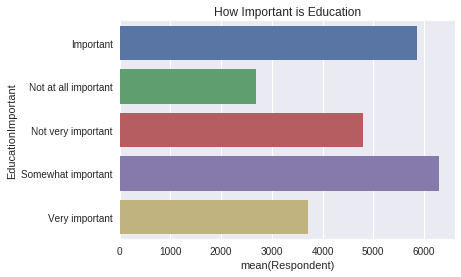

In [213]:
educationimp = public[[ 'Respondent' , 'EducationImportant']].groupby(["EducationImportant"] , as_index = False).count()
sns.barplot(y = 'EducationImportant' , x = 'Respondent' ,data = educationimp)
plt.title('How Important is Education')

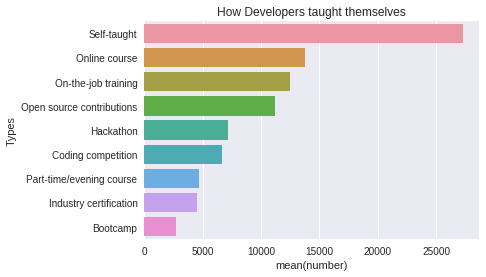

In [214]:
educationtypes = {'Types': ['Self-taught','Online course','On-the-job training','Open source contributions','Hackathon','Coding competition','Part-time/evening course','Industry certification','Bootcamp'] , 'number' : np.zeros(9)}
def typecount(types):
    i = 0
    for x in types['Types']:
        types['number'][i] = public.EducationTypes.str.contains(x).sum()
        i = i + 1
typecount(educationtypes)
Typedf = pd.DataFrame(educationtypes)

sns.barplot(y = 'Types' , x = 'number' ,data = Typedf)
plt.title("How Developers taught themselves")

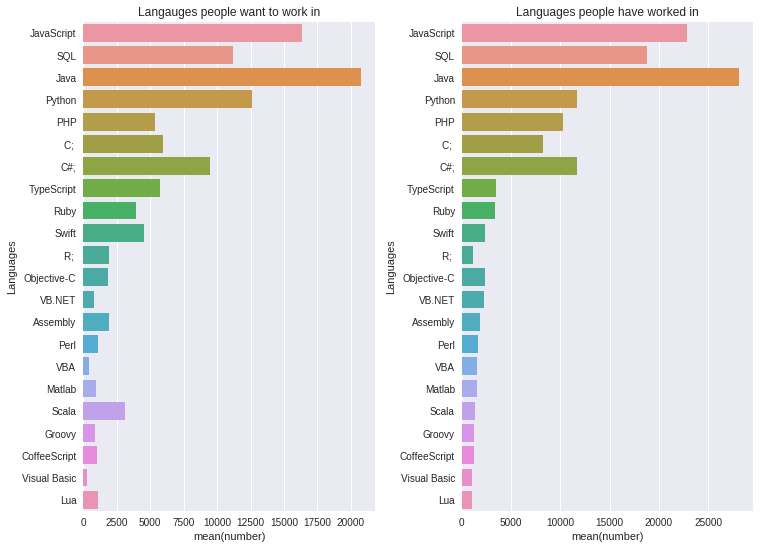

In [215]:
eTypes = {'Languages' : ['JavaScript','SQL','Java','Python','PHP','C; ','C#;','TypeScript','Ruby','Swift','R; ','Objective-C','VB.NET','Assembly','Perl','VBA','Matlab','Scala','Groovy','CoffeeScript','Visual Basic','Lua'] , 'number':np.zeros(22)}
def typecount2(Types):
    i = 0
    for x in Types['Languages']:
        Types['number'][i] = public.WantWorkLanguage.str.contains(x).sum()
        i = i + 1
typecount2(eTypes)
Typedf = pd.DataFrame(eTypes)
fig , ax = plt.subplots(1 , 2 , figsize = (12, 9))
sns.barplot(y = 'Languages' , x = 'number' ,data = Typedf , ax = ax[0])
def typecount2(Types):
    i = 0
    for x in Types['Languages']:
        Types['number'][i] = public.HaveWorkedLanguage.str.contains(x).sum()
        i = i + 1
typecount2(eTypes)
Typedf = pd.DataFrame(eTypes)
sns.barplot(y = 'Languages' , x = 'number' ,data = Typedf , ax = ax[1])
fig.subplots_adjust(wspace = 0.3)
ax[0].set_title("Langauges people want to work in")
ax[1].set_title("Languages people have worked in")

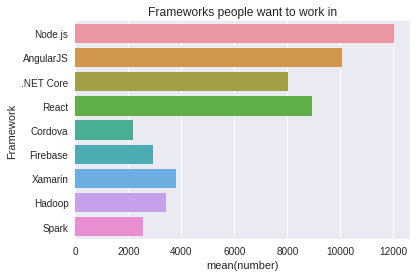

In [216]:
eTypes = {'Framework':['Node.js','AngularJS','.NET Core','React','Cordova','Firebase','Xamarin','Hadoop','Spark'] , 'number':np.zeros(9)}
def typecount2(Types):
    i = 0
    for x in Types['Framework']:
        Types['number'][i] = public.WantWorkFramework.str.contains(x).sum()
        i = i + 1
typecount2(eTypes)
Typedf = pd.DataFrame(eTypes)
sns.barplot(y = 'Framework' , x = 'number' ,data = Typedf)
plt.title("Frameworks people want to work in")